In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [32]:
PATH = "../data/census/poverty/"
poverty_df_21 = pd.read_csv(PATH + "SW_poverty_2021.csv")
poverty_df_20 = pd.read_csv(PATH + "SW_poverty_2020.csv")
poverty_df_19 = pd.read_csv(PATH + "SW_poverty_2019.csv")
poverty_df_18 = pd.read_csv(PATH + "SW_poverty_2018.csv")
poverty_df_17 = pd.read_csv(PATH + "SW_poverty_2017.csv")
poverty_df_16 = pd.read_csv(PATH + "SW_poverty_2016.csv")
poverty_df_15 = pd.read_csv(PATH + "SW_poverty_2015.csv")
poverty_df_14 = pd.read_csv(PATH + "SW_poverty_2014.csv")

In [33]:
# White
# Black or African American
# American Indian and Alaska Native
# Asian
# Native Hawaiian and Other Pacific Islander
# Some Other Race alone

def fix_labels(df):
    df["Label (Grouping)"] = df["Label (Grouping)"].map(lambda x: x.lstrip('\xa0'))

    
def get_topics_idcs(df):
    return df[df.isna().any(axis=1)].index


def get_topics(df):
    # Get IDCS of Grouping Rows
    idcs = get_topics_idcs(df)
    idx_pairs = [(idcs[i], idcs[i+1]) if i < (len(idcs) - 1) else (idcs[i],) for i in range(len(idcs))]
    
    # Format the labels
    fix_labels(df)
    
    labels = df.iloc[idcs]["Label (Grouping)"].values
    return list(zip(idx_pairs, labels))


def get_all_sub_dfs(df):
    
    all_subtopics = get_topics(df)
    topic = {}
    subtopics = []
    
    for subtopic_idcs, subtopic in all_subtopics:
        
        if len(subtopic_idcs) == 2:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:subtopic_idcs[1]]
        else:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:]
            
        # Check whether the first row contains values of interest
        if not df.iloc[0].isna().any():
            topic[subtopic].loc[-1] = df.loc[0]                # adding a row
            topic[subtopic].index = topic[subtopic].index + 1  # shifting index
            topic[subtopic] = topic[subtopic].sort_index()     # sorting by index

            
        topic[subtopic] = topic[subtopic].rename(columns={"Label (Grouping)": subtopic})
        topic[subtopic].set_index(subtopic, inplace=True)
        subtopics.append(subtopic)
            
    subtopics = '\n'.join([subtopic for subtopic in subtopics])
    print("The subtopics are:")
    print(subtopics)
    
    return topic


def convert_series_to_int(series):
    new_series = [int("".join(x.split(","))) if type(x) == str else x for x in series.values]
    return np.asarray(new_series)
    


In [34]:
fix_labels(poverty_df_21)
fix_labels(poverty_df_20)
fix_labels(poverty_df_19)
fix_labels(poverty_df_18)
fix_labels(poverty_df_17)
fix_labels(poverty_df_16)
fix_labels(poverty_df_15)
fix_labels(poverty_df_14)

In [35]:
poverty_dict_21 = get_all_sub_dfs(poverty_df_21)
poverty_dict_20 = get_all_sub_dfs(poverty_df_20)
poverty_dict_19 = get_all_sub_dfs(poverty_df_19)
poverty_dict_18 = get_all_sub_dfs(poverty_df_18)
poverty_dict_17 = get_all_sub_dfs(poverty_df_17)
poverty_dict_16 = get_all_sub_dfs(poverty_df_16)
poverty_dict_15 = get_all_sub_dfs(poverty_df_15)
poverty_dict_14 = get_all_sub_dfs(poverty_df_14)

The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLOYMENT STATUS
WORK EXPERIENCE
ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLOYMENT STATUS
WORK EXPERIENCE
ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLOYMENT STATUS
WORK EXPERIENCE
ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLOYMENT STATUS
WORK EXPERIENCE
ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLOYMENT STATUS
WORK EXPERIENCE
ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
EDUCATIONAL ATTAINMENT
EMPLO

In [36]:
poverty_race_21 = poverty_dict_21["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_20 = poverty_dict_20["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_19 = poverty_dict_19["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_18 = poverty_dict_18["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_17 = poverty_dict_17["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_16 = poverty_dict_16["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_15 = poverty_dict_15["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_14 = poverty_dict_14["RACE AND HISPANIC OR LATINO ORIGIN"]

In [7]:
poverty_race_years = [poverty_race_21, poverty_race_20, poverty_race_19, poverty_race_18, poverty_race_17,
                      poverty_race_16, poverty_race_15, poverty_race_14]

for idx in range(len(poverty_race_years)):
    
    # Preprocess data
    all_columns = []
    for column in poverty_race_years[idx].iloc[:-1].columns:
        if "Percent" in column:
            all_columns.append(column)

    poverty_race_years[idx].drop(columns=all_columns, inplace=True)
    poverty_race_years[idx] = poverty_race_years[idx].apply(convert_series_to_int)

    poverty_race_years[idx].columns = [x[1].split(", District")[0][1:] + " - " + x[-1].split("!!")[1] for x in poverty_race_years[idx].columns.str.split("Census")]
    poverty_race_years[idx] = poverty_race_years[idx].iloc[:-2]

In [8]:
# What would be good to look at?

# 1. Percentage of Tract that is below poverty level
# 2. Percentage of which race makes up which portion of Below poverty level
# 3. Percentage of how many of a race are below poverty level

poverty_race_years[0]

,Tract 64 - Total,Tract 64 - Below poverty level,Tract 102.01 - Total,Tract 102.01 - Below poverty level,Tract 102.02 - Total,Tract 102.02 - Below poverty level,Tract 105 - Total,Tract 105 - Below poverty level,Tract 110.01 - Total,Tract 110.01 - Below poverty level,Tract 110.02 - Total,Tract 110.02 - Below poverty level
RACE AND HISPANIC OR LATINO ORIGIN,,,,,,,,,,,,
Population for whom poverty status is determined,2418,1046,2522,153,1930,138,4027,841,2385,64,1469,90
White alone,549,41,1313,46,951,76,2051,66,1420,0,1051,90
Black or African American alone,1769,983,695,74,628,25,1460,667,791,22,237,0
American Indian and Alaska Native alone,0,0,0,0,0,0,0,0,0,0,0,0
Asian alone,38,0,157,33,71,9,137,20,58,0,60,0
Native Hawaiian and Other Pacific Islander alone,0,0,0,0,0,0,14,0,0,0,0,0
Some other race alone,21,11,37,0,127,0,38,0,0,0,25,0
Two or more races,41,11,320,0,153,28,327,88,116,42,96,0


In [45]:
tracts = ["Tract 64", "Tract 102.01", "Tract 102.02", "Tract 105", "Tract 110.01", "Tract 110.02"]
tract_df = poverty_race_years[-1].loc[:, poverty_race_years[-1].columns.str.contains(tracts[0])]
tract_df

,Tract 64 - Total,Tract 64 - Below poverty level
RACE AND HISPANIC OR LATINO ORIGIN,,
Population for whom poverty status is determined,1986,933
One race,1986,933
White,103,0
Black or African American,1804,898
American Indian and Alaska Native,10,10
Asian,54,25
Native Hawaiian and Other Pacific Islander,0,0
Some other race,15,0
Two or more races,0,0


In [10]:
# 1. Percentage of Tract that is below poverty level


# Get the data
# ------------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014"]


poverty_by_tract = {}
for tract in tracts:

    poverty_by_year = {}
    
    for idx, year in enumerate(years):
        
        try:
            tract_df = poverty_race_years[idx].loc[:, poverty_race_years[idx].columns.str.contains(tract)]

            # Get total number of people below and above poverty level
            above_poverty = tract_df.iloc[0].values[0] - tract_df.iloc[0].values[1]
            all_values = np.append(tract_df.iloc[1:, 1].values.sum(), above_poverty)

            # poverty_by_tract[tract] = all_values
            poverty_by_year[year] = all_values
        except IndexError:
            continue
            
    # reverse the dictionary to stay in chronological order
    poverty_by_tract[tract] = dict(reversed(list(poverty_by_year.items())))

In [11]:
poverty_by_tract["Tract 64"]

{'2014': array([1866, 1053]),
 '2015': array([ 943, 1187]),
 '2016': array([1100, 1355]),
 '2017': array([1229, 1259]),
 '2018': array([ 898, 1671]),
 '2019': array([1007, 1827]),
 '2020': array([ 957, 1504]),
 '2021': array([1046, 1372])}

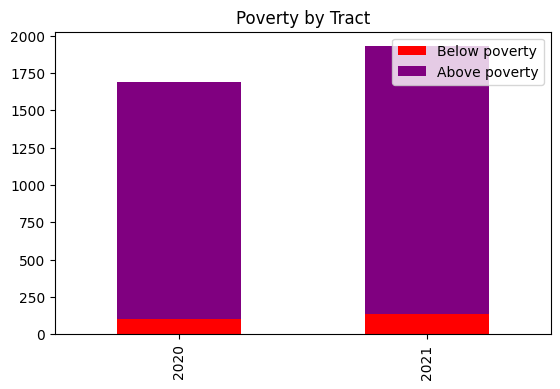

In [109]:
# Plot the data
# -------------
df_for_plotting = pd.DataFrame.from_dict(poverty_by_tract["Tract 102.02"], orient="index", columns=["Below poverty", "Above poverty"])
df_for_plotting.plot(color=["red", "purple"], kind="bar", stacked=True, title="Poverty by Tract")
plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig("../plots/race/poverty_tract_102_2_per_year.png")

In [13]:
poverty_race_years[0].index

Index(['Population for whom poverty status is determined', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races'],
      dtype='object', name='RACE AND HISPANIC OR LATINO ORIGIN')

In [29]:
tract_df

""
RACE AND HISPANIC OR LATINO ORIGIN
Population for whom poverty status is determined
One race
White
Black or African American
American Indian and Alaska Native
Asian
Native Hawaiian and Other Pacific Islander
Some other race
Two or more races


In [47]:
# 2. Percentage of which race makes up which portion of Below Poverty level


# Get appropriate columns for the data frame
# ------------------------------------------
race_labels = np.asarray([x.split(" alone")[0] for x in list(poverty_race_years[0].index)])
new_columns = race_labels[1:]
new_columns[-1] = "Mixed race"


# Get data
# --------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014"]


poverty_by_tract = {}
for tract in tracts:

    poverty_by_year = {}
    
    for idx, year in enumerate(years):
        
        try:

            tract_df = poverty_race_years[idx].loc[:, poverty_race_years[idx].columns.str.contains(tract)]
            values = tract_df.iloc[1:, 1].values

            # poverty_by_tract[tract] = all_values
            if year == "2014":
                poverty_by_year[year] = values[1:]
            else:
                poverty_by_year[year] = values
            
        except IndexError:
            continue
            
    # reverse the dictionary to stay in chronological order
    poverty_by_tract[tract] = dict(reversed(list(poverty_by_year.items())))
    

In [48]:
poverty_by_tract["Tract 64"]

{'2014': array([  0, 898,  10,  25,   0,   0,   0]),
 '2015': array([  0, 911,   7,  25,   0,   0,   0]),
 '2016': array([   8, 1066,    9,   17,    0,    0,    0]),
 '2017': array([  47, 1173,    9,    0,    0,    0,    0]),
 '2018': array([ 47, 842,   0,   0,   0,   9,   0]),
 '2019': array([ 51, 946,   0,   0,   0,  10,   0]),
 '2020': array([ 52, 895,   0,   0,   0,  10,   0]),
 '2021': array([ 41, 983,   0,   0,   0,  11,  11])}

In [64]:
pd.DataFrame.from_dict(poverty_by_tract["Tract 102.02"], orient="index", columns=new_columns)

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Mixed race
2020,67,27,0,8,0,0,0
2021,76,25,0,9,0,0,28


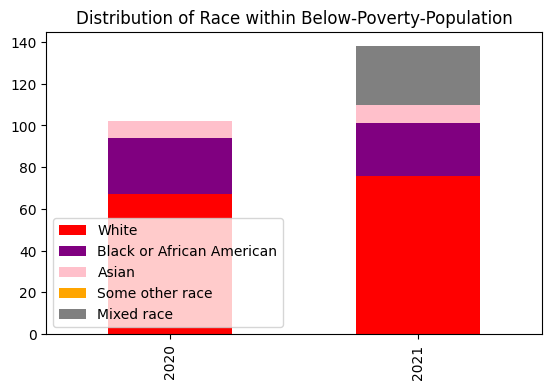

In [63]:
# Plot data
# ---------
df_for_plotting = pd.DataFrame.from_dict(poverty_by_tract["Tract 102.02"], orient="index", columns=new_columns)

# drop empty columns
df_for_plotting = df_for_plotting.drop(["American Indian and Alaska Native", "Native Hawaiian and Other Pacific Islander"], axis=1)
df_for_plotting.plot(color=["red", "purple", "pink", "orange", "gray"], 
                     kind="bar", stacked=True, title="Distribution of Race within Below-Poverty-Population")

plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("../plots/race/dist_of_race_below_poverty_per_year/dist_of_race_tract102_02.png")

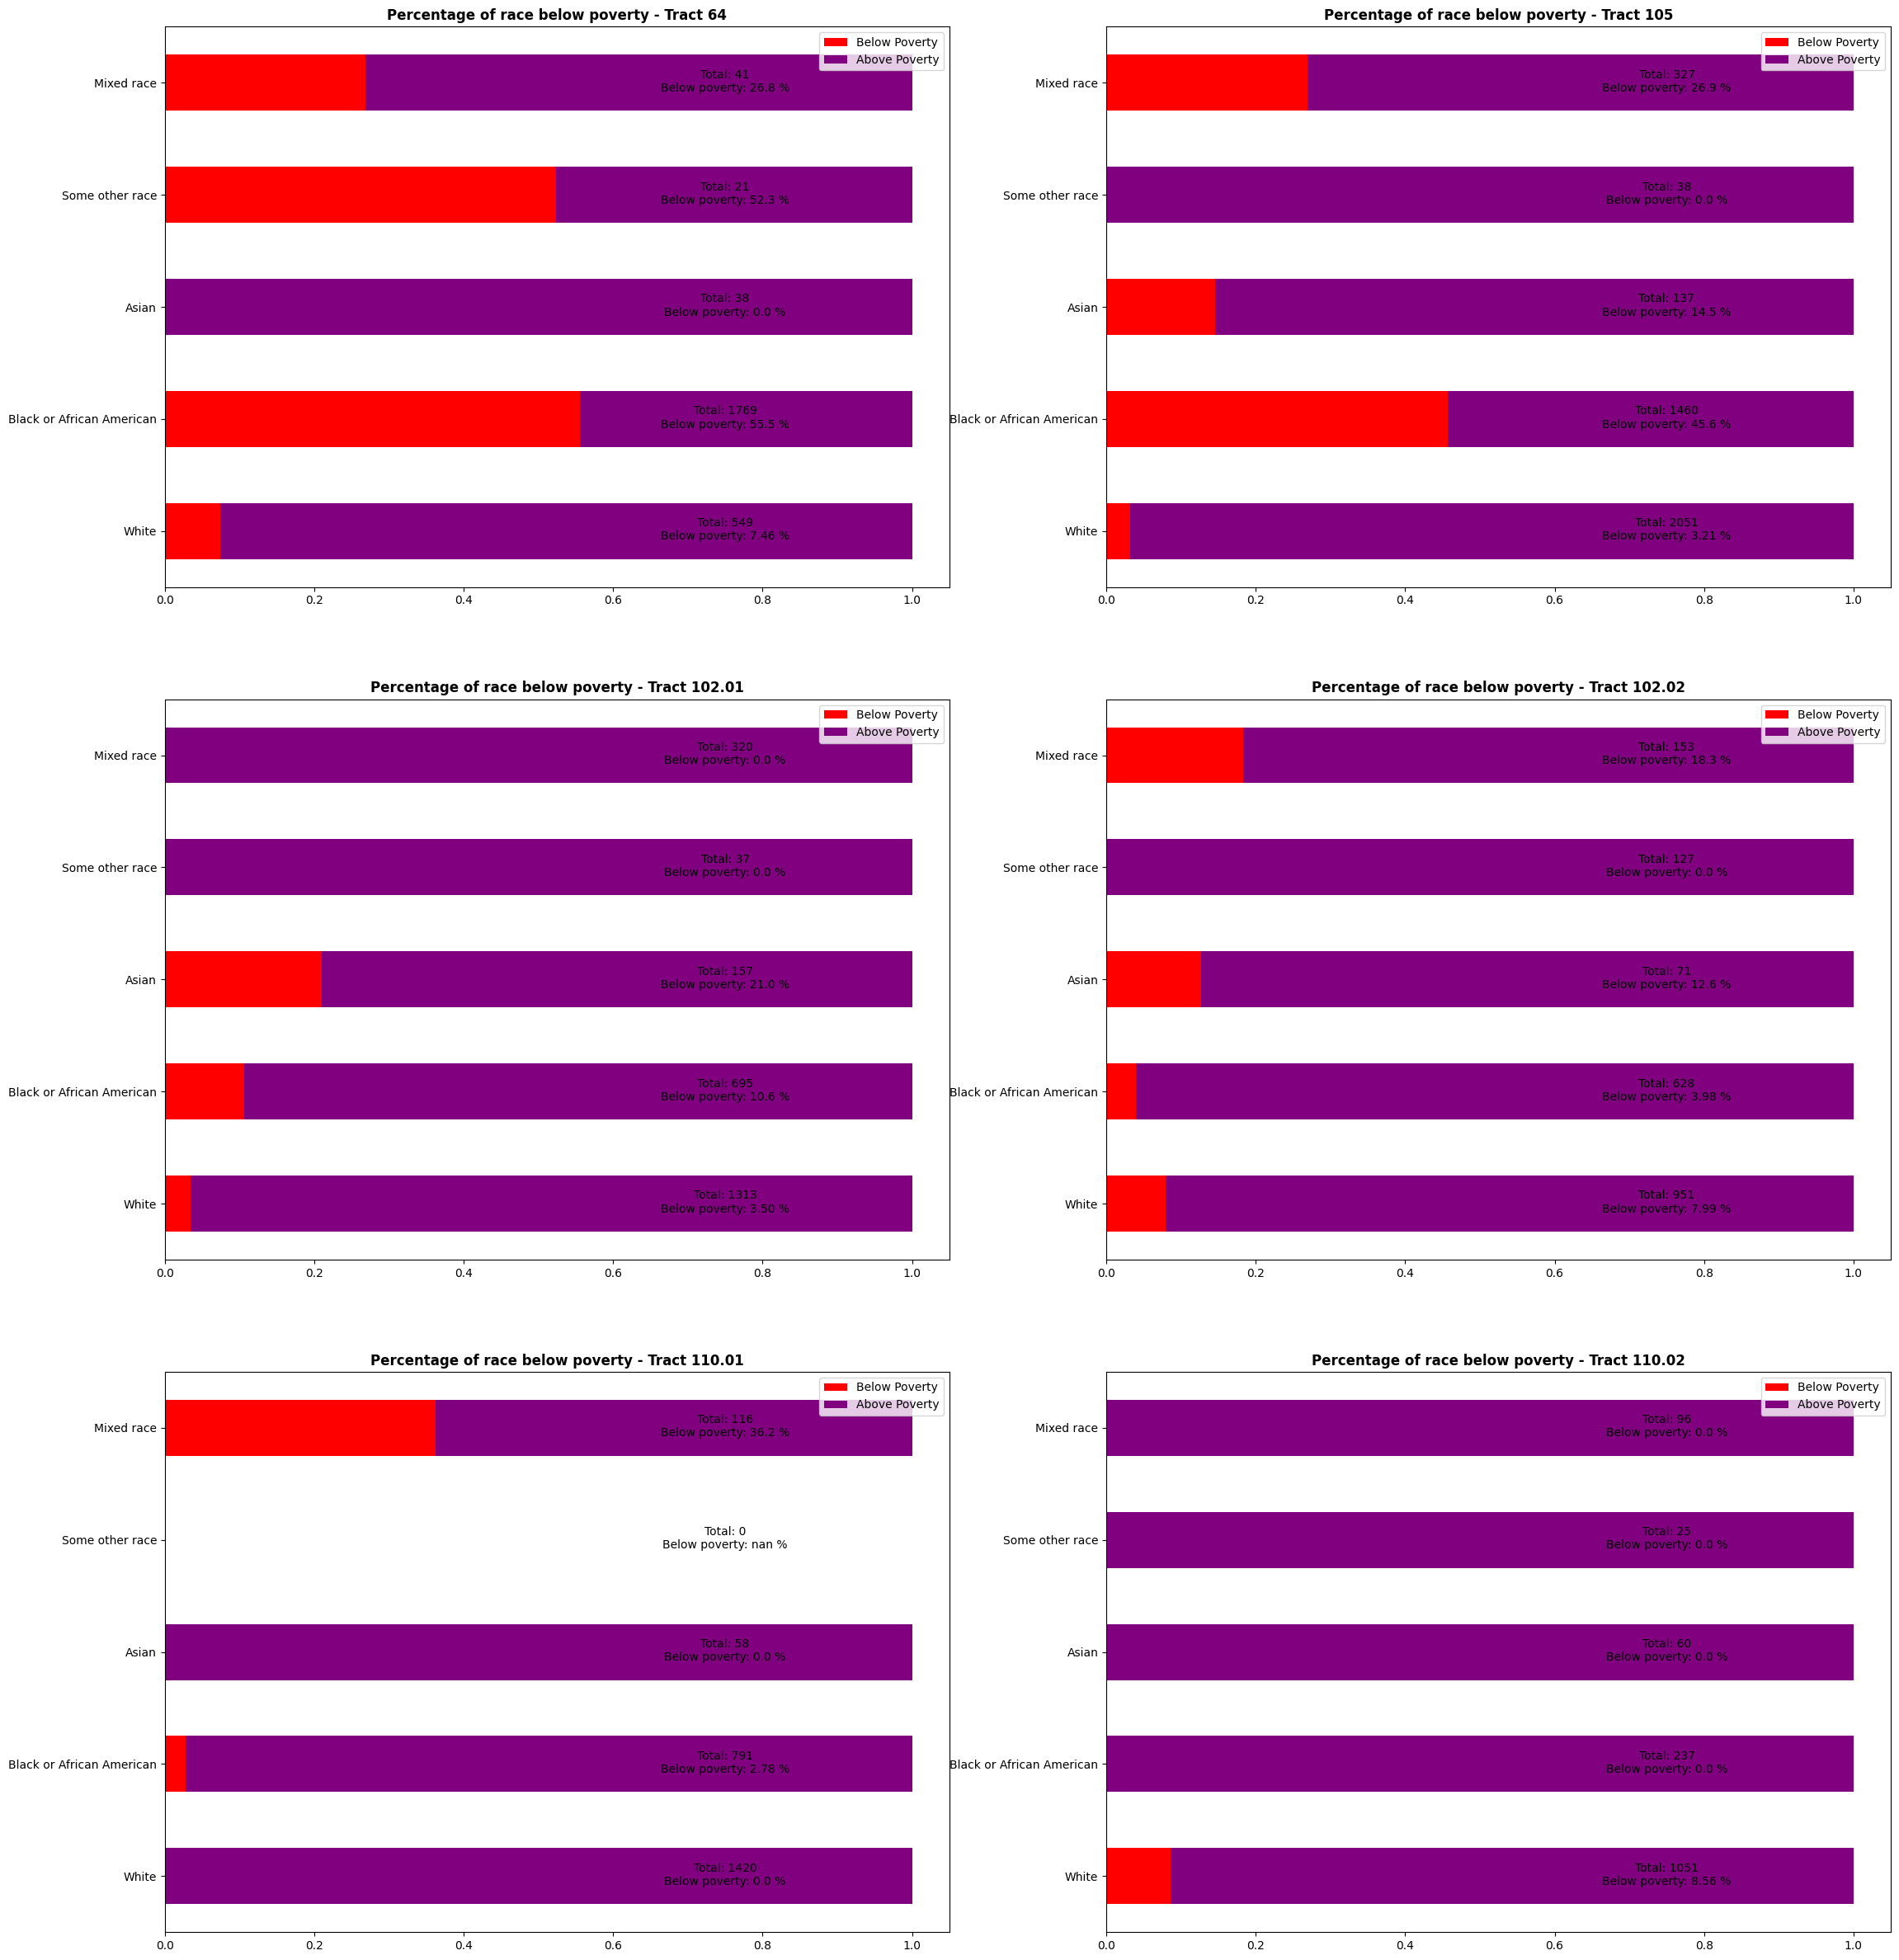

In [332]:
# 3. Percentage of how many of a race are below poverty level

# Get data
# --------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]

poverty_per_race_per_tract = {}
total_per_tract = {}

for tract in tracts:
    tract_df = poverty_race.iloc[1:, poverty_race.columns.str.contains(tract)]
    tract_df = tract_df.drop(["American Indian and Alaska Native alone", "Native Hawaiian and Other Pacific Islander alone"])
    
    tract_df.index = np.asarray([x.split(" alone")[0] for x in list(tract_df.index)])
    labels = list(tract_df.index)
    labels[-1] = "Mixed race"
    
    # Total number of people of race within tract
    total_per_tract[tract] = tract_df.iloc[:, 0].values
    
    # Percentage of Poverty Within Race
    # e.g. 55% of Black Population within tract is below poverty level
    poverty_within_race_percent = tract_df.apply(lambda x: x[1] / x[0], axis=1).values
    poverty_per_race_per_tract[tract] = pd.DataFrame.from_dict({"Race": labels,
                                                                "Below Poverty": poverty_within_race_percent,
                                                                "Above Poverty": np.ones(5) - poverty_within_race_percent})
    poverty_per_race_per_tract[tract] = poverty_per_race_per_tract[tract].set_index("Race")
    
    
    
# Plot data
# ---------

# Helper Functions
def addlabels(rects, labels, ax):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(height + 0.25, rect.get_y() + 0.15, label, ha="center", va="bottom")
        
def convert_to_percent(values):
    percentages = [str(x * 100)[:4] + " %" for x in values]
    return percentages

def add_percent_to_labels(labels, values):
    percentages = convert_to_percent(values)
    new_labels = []
    for idx in range(len(percentages)):
        new_labels.append(
            labels[idx] + "\n" + "Below poverty: " + percentages[idx]
        )
    return new_labels

    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(27, 30))
row_idcs = [0, 0, 1, 1, 2, 2]

for idx, tract in enumerate(tracts):
    row_idx = row_idcs[idx]
    column_idx = idx % 2    
    
    curr_ax = axes[row_idx, column_idx]
    poverty_per_race_per_tract[tract].plot(color=["red", "purple"], 
                                                kind="barh", stacked=True, ax=curr_ax)
    rects = curr_ax.patches
    
    # Get the total number of people of race in tract
    labels = ["Total: "+ str(x) for x in total_per_tract[tract]]
    # Get percentage of people below poverty
    percentages = poverty_per_race_per_tract[tract]["Below Poverty"].values
    labels = add_percent_to_labels(labels, percentages)

    curr_ax.set_title("Percentage of race below poverty - " + tract, fontweight="bold")
    curr_ax.set_ylabel('')
    addlabels(rects, labels, curr_ax)


plt.savefig("../plots/race/percentage_of_race_below_poverty.png")
plt.savefig("../plots/race/percentage_of_race_below_poverty.pdf")

In [312]:
ls = poverty_per_race_per_tract["Tract 64"]["Below Poverty"].values

In [326]:
def convert_to_percent(values):
    percentages = [str(x * 100)[:4] + " %" for x in values]
    return percentages

In [328]:
convert_to_percent(ls)

['7.46 %', '55.5 %', '0.0 %', '52.3 %', '26.8 %']

In [329]:
labels

['Total: 1051', 'Total: 237', 'Total: 60', 'Total: 25', 'Total: 96']

In [330]:
def add_percent_to_labels(labels, values):
    percentages = convert_to_percent(values)
    new_labels = []
    for idx in range(len(percentages)):
        new_labels.append(
            labels[idx] + "\n" + "Below poverty: " + percentages[idx]
        )
        
    return new_labels

In [331]:
add_percent_to_labels(labels, ls)

['Total: 1051\nBelow poverty: 7.46 %',
 'Total: 237\nBelow poverty: 55.5 %',
 'Total: 60\nBelow poverty: 0.0 %',
 'Total: 25\nBelow poverty: 52.3 %',
 'Total: 96\nBelow poverty: 26.8 %']